# PREDICTING HOUSE PRICES

### Importing Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

### Loading the Data

The data has been taken from  
https://www.kaggle.com/quantbruce/real-estate-price-prediction  
We will predict the house price on the basis of it's age, no. of convinience stores nearby and the distance to the nearest MRT station. Latitude and Longitude are irrelevant to the model.

In [17]:
data = pd.read_csv('real_estate.csv')

In [18]:
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [19]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### Creating Regression

In [20]:
y=data['Y house price of unit area']
# Multiple Regression
# 3 independent variables (loaded as a dataframe)
x1=data[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores']]

### Creating Plots

###### Age vs Price

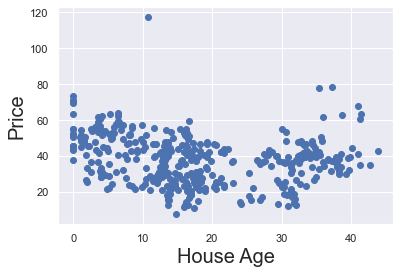

In [21]:
plt.scatter(data['X2 house age'],y)
plt.xlabel('House Age', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.show()

##### Distance to MRT Station vs Price

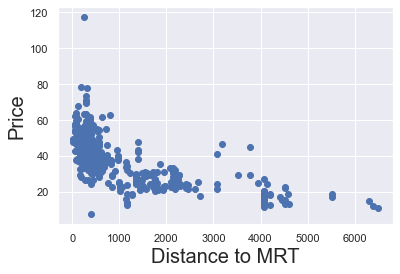

In [22]:
plt.scatter(data['X3 distance to the nearest MRT station'],y)
plt.xlabel('Distance to MRT', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.show()

###### Number of Convinience Stores vs Price

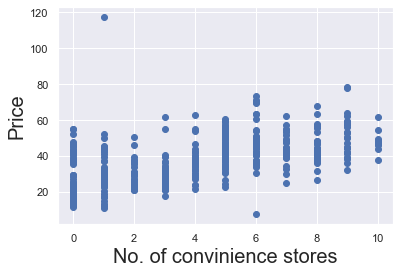

In [23]:
plt.scatter(data['X4 number of convenience stores'],y)
plt.xlabel('No. of convinience stores', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.show()

In [24]:
#OLS
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.541
Model:                                    OLS   Adj. R-squared:                  0.538
Method:                         Least Squares   F-statistic:                     161.1
Date:                        Mon, 20 Jul 2020   Prob (F-statistic):           5.44e-69
Time:                                09:01:20   Log-Likelihood:                -1506.5
No. Observations:                         414   AIC:                             3021.
Df Residuals:                             410   BIC:                             3037.
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     42.9773      1.385     31.041      0.000      40.256      45.699
X2 house age                              -0.2529      0.040     -6.305      0.000      -0.332      -0.174
X3 distance to the nearest MRT station    -0.0054      0.000    -11.874      0.000      -0.006      -0.004
X4 number of convenience stores            1.2974      0.194      6.678      0.000       0.916       1.679
==============================================================================
Omnibus:                      222.427   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3065.900
Skew:                           1.958   Prob(JB):                         0.00
Kurtosis:                      15.744   Cond. No.                     5.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Making Predictions

In [11]:
x

,const,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
0,1.0,32.0,84.87882,10
1,1.0,19.5,306.59470,9
2,1.0,13.3,561.98450,5
3,1.0,13.3,561.98450,5
4,1.0,5.0,390.56840,5
...,...,...,...,...
409,1.0,13.7,4082.01500,0
410,1.0,5.6,90.45606,9
411,1.0,18.8,390.96960,7
412,1.0,8.1,104.81010,5


In [25]:
#Entering values for prediction
new_data=pd.DataFrame({'const':1,'X2 house age':[5,7.2,10],'X3 distance to the nearest MRT station':[500,200,100],'X4 number of convenience stores':[2,5,10]})
new_data=new_data[['const','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores']]
new_data

,const,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
0,1,5.0,500,2
1,1,7.2,200,5
2,1,10.0,100,10


In [26]:
predictions = results.predict(new_data)

In [27]:
predictions

0    41.618327
1    46.568111
2    52.885240
dtype: float64

##### Joining the new predictions to the data

In [15]:
predictionsdf=pd.DataFrame({'Predictions':predictions})
joined=new_data.join(predictionsdf)
joined.rename(index={0:'House 1',1:'House 2',2:'House 3'})

,const,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Predictions
House 1,1,5.0,500,2,41.618327
House 2,1,7.2,200,5,46.568111
House 3,1,10.0,100,10,52.885240
